In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
import pingouin as pg
from scipy import stats
%matplotlib inline

In [2]:
def teste_normalidade(x):
    # Plotting the histogram with KDE line
    plt.subplot(1, 2, 1)
    plt.rcParams["figure.figsize"] = (8, 4)
    ax = sns.histplot(x, kde=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='x', width=0.5, color='gray')
    ax.tick_params(axis='y', width=0.5, color='gray')

    # Plotting the QQ-plot
    plt.subplot(1, 2, 2)
    pg.qqplot(x, dist='norm')
    
    # Calculating skewness and kurtosis
    print('Sample size:', len(x))
    print('Skewness:', stats.skew(x), '(The farther from zero, the less normal)')
    print('Kurtosis:', stats.kurtosis(x))

    # Shapiro-Wilk test (may not work well with many identical values)
    W, p = stats.shapiro(x)
    print('Shapiro-Wilk: W={0}, p={1}'.format(W, p), '(if p > 0.05, it is normal)')

    # Kolmogorov-Smirnov test
    D, p = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()), N=len(x))
    print('Kolmogorov-Smirnov: D={0}, p={1}'.format(D, p), '(if p > 0.05, it is normal)')

    # Anderson-Darling test
    ad_stat, ad_critical, ad_theoretical = stats.anderson(x, dist='norm')
    print('Anderson-Darling: T={0}, p(0.05)={1}'.format(ad_stat, ad_critical[2]), '(if p > 0.05, it is normal)')
    print('Anderson-Darling critical values:', ad_critical)
    print('Anderson-Darling percentages:', ad_theoretical)

In [3]:
df = pd.read_csv("data/dapi_results_sem_enlarge.tsv", sep='\t')

In [4]:
df

Label     Area      Mean  \
0    1  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_Out_...  211.368  4609.158   
1    2  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_Out_...    4.157  2198.200   
2    3  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_Out_...  207.211  4657.528   
3    4  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...  254.412  1426.538   
4    5  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...    7.033  1007.465   
5    6  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...  247.380  1438.452   
6    7  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...  339.283  1045.028   
7    8  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...    8.763  1000.473   
8    9  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...  330.520  1046.209   
9   10  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...  239.996  1313.631   
10  11  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...    7.826   638.897   
11  12  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...  232.170  1336.374   
12  13  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-03_Out_...  287.327  5534.136   
13  14  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-03_Out_...   11.964  2995.918   
14  15  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-03_Out_...  275.362  5644.418   
15  16  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-03_Out_...  237.428  6338.549   
16  17  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-03_Out_...    6.347  3235.954   
17  18  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-03_Out_...  231.081  6423.774   
18  19  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-05_Out_...  257.256  6512.005   
19  20  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-05_Out_...    7.190  3001.290   
20  21  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-05_Out_...  250.066  6612.940   
21  22  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-06_Out_...  445.773  6240.480   
22  23  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-06_Out_...   23.077  3392.708   
23  24  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-06_Out_...  422.696  6395.954   
24  25  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-06_Out_...  243.347  7531.286   
25  26  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-06_Out_...    8.824  3205.181   
26  27  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-06_Out_...  234.524  7694.051   
27  28  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-07_Out_...  234.859  1766.990   
28  29  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-07_Out_...    2.884   504.816   
29  30  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-07_Out_...  231.976  1782.681   
30  31  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-08_Out_...  251.142  4999.729   
31  32  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-08_Out_...    6.690  5055.575   
32  33  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-08_Out_...  244.452  4998.200   
33  34  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-16_Out_...  267.571  1194.596   
34  35  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-16_Out_...    2.030   570.792   
35  36  d2-dox-h2ax-647-dnapk-564-fak-488-dapi-16_Out_...  265.541  1199.365   

    Mode  Min    Max       IntDen  Median     RawIntDen  Group  
0      0    0  30417   974227.119    3695  9.371617e+08      1  
1      0    0  15499     9138.275    1035  8.790601e+06      4  
2      0    0  30417   965088.844    3757  9.283711e+08      5  
3      0    0  10500   362929.002    1128  3.491210e+08      1  
4      0    0   6923     7085.058     658  6.815500e+06      4  
5      0    0  10500   355843.944    1142  3.423055e+08      5  
6      0    0   9794   354560.482     782  3.410709e+08      1  
7      0    0   6307     8767.555     690  8.433985e+06      4  
8      0    0   9794   345792.927     784  3.326369e+08      5  
9      0    0  10515   315266.008     977  3.032714e+08      1  
10     0    0   5068     4999.843     141  4.809619e+06      4  
11     0    0  10515   310266.166    1006  2.984618e+08      5  
12     0    0  41354  1590104.441    4197  1.529607e+09      1  
13     0    0  22806    35843.728    1430  3.448002e+07      4  
14     0    0  41354  1554260.713    4351  1.495127e+09      5  
15     0    0  47396  1504950.231    5145  1.447693

In [5]:
map_dict = {
    1: "nucleus",
    4: "combine",
    5: 'nucleus less combine'
}

df['Group'] = df['Group'].map(map_dict)

In [6]:
df_mean = df.groupby('Group').describe()['Mean']

In [7]:
df_mean

count         mean          std       min         25%  \
Group                                                                         
combine                12.0  2233.939083  1469.328769   504.816   910.07900   
nucleus                12.0  4042.677167  2493.605104  1045.028  1398.31125   
nucleus less combine   12.0  4102.495500  2544.814871  1046.209  1412.93250   

                            50%         75%       max  
Group                                                  
combine               2597.0590  3212.87425  5055.575  
nucleus               4804.4435  6264.99725  7531.286  
nucleus less combine  4827.8640  6402.90900  7694.051

<Axes: >

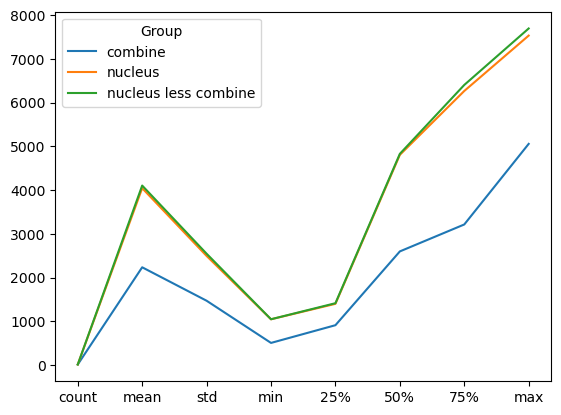

In [8]:
df_mean.transpose().plot()

<Axes: title={'center': 'Mean'}, xlabel='Group'>

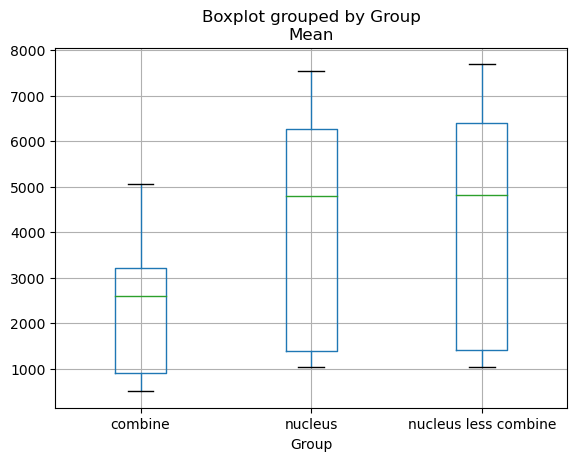

In [9]:
df.boxplot(column="Mean", by='Group')

In [10]:
combine_data = df[df['Group']== 'combine']['Mean']
nucleus_data =  df[df['Group']== 'nucleus']['Mean']
nuc_less_comb_data =  df[df['Group']== 'nucleus less combine']['Mean']

# Teste de normalidade

Sample size: 12
Skewness: 0.2779959671069871 (The farther from zero, the less normal)
Kurtosis: -0.9698552651884729
Shapiro-Wilk: W=0.8900776505470276, p=0.11811179667711258 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.21472820591232616, p=0.5660296153316631 (if p > 0.05, it is normal)
Anderson-Darling: T=0.5966069728747581, p(0.05)=0.679 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.497 0.566 0.679 0.792 0.942]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


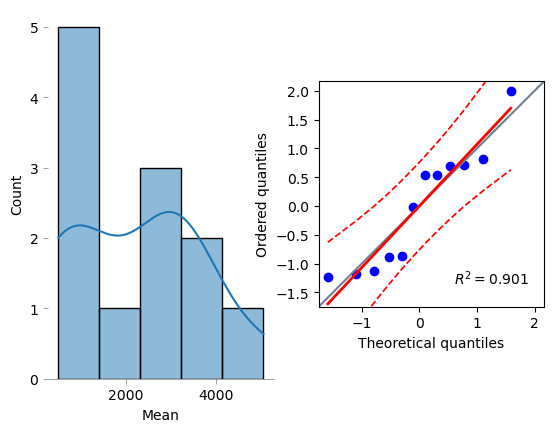

In [11]:
teste_normalidade(combine_data)

Sample size: 12
Skewness: -0.09458873495916428 (The farther from zero, the less normal)
Kurtosis: -1.6713898654480408
Shapiro-Wilk: W=0.8494744300842285, p=0.03616867586970329 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.2359426315722284, p=0.44802783725312334 (if p > 0.05, it is normal)
Anderson-Darling: T=0.7859999454869993, p(0.05)=0.679 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.497 0.566 0.679 0.792 0.942]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


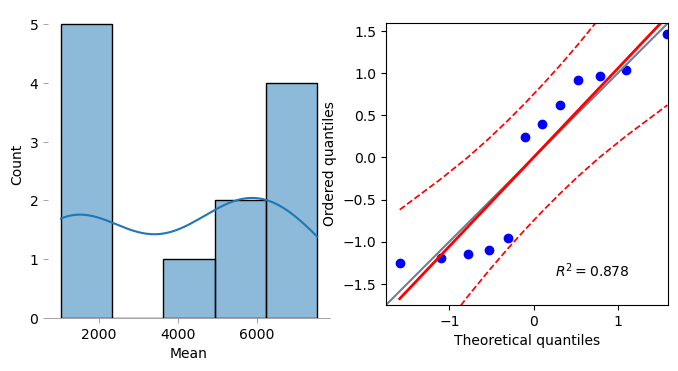

In [12]:
teste_normalidade(nucleus_data)

Sample size: 12
Skewness: -0.08236329406378466 (The farther from zero, the less normal)
Kurtosis: -1.6630996829006623
Shapiro-Wilk: W=0.8513509035110474, p=0.03815186023712158 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.23567299752316156, p=0.4494412805277561 (if p > 0.05, it is normal)
Anderson-Darling: T=0.7759036802195851, p(0.05)=0.679 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.497 0.566 0.679 0.792 0.942]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


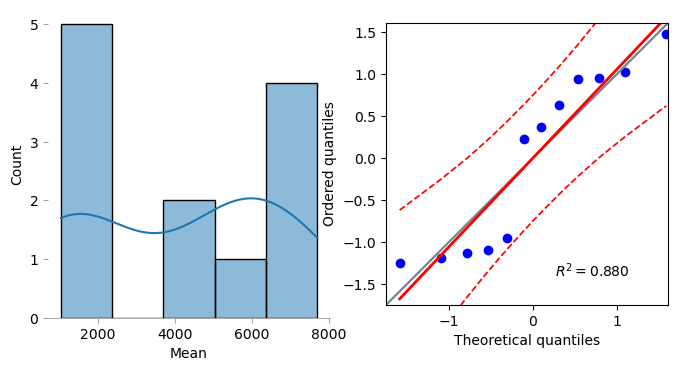

In [13]:
teste_normalidade(nuc_less_comb_data)

# Teste para distribuições não normais

In [14]:
from scipy.stats import mannwhitneyu

def mwu_test(controle, tratamento):
    stat, p = stats.mannwhitneyu(controle, tratamento)
    print('t=%.3f, p=%.5f' % (stat, p))
    if p <= 0.0001:
        return "****"
    elif p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    return "NS"


In [15]:
mwu_test(combine_data, nuc_less_comb_data)

t=37.000, p=0.04639


'*'

In [16]:
mwu_test(combine_data, nucleus_data)

t=37.000, p=0.04639


'*'

# Grafico

[2233.939083333333, 4042.6771666666664, 4102.495499999999]


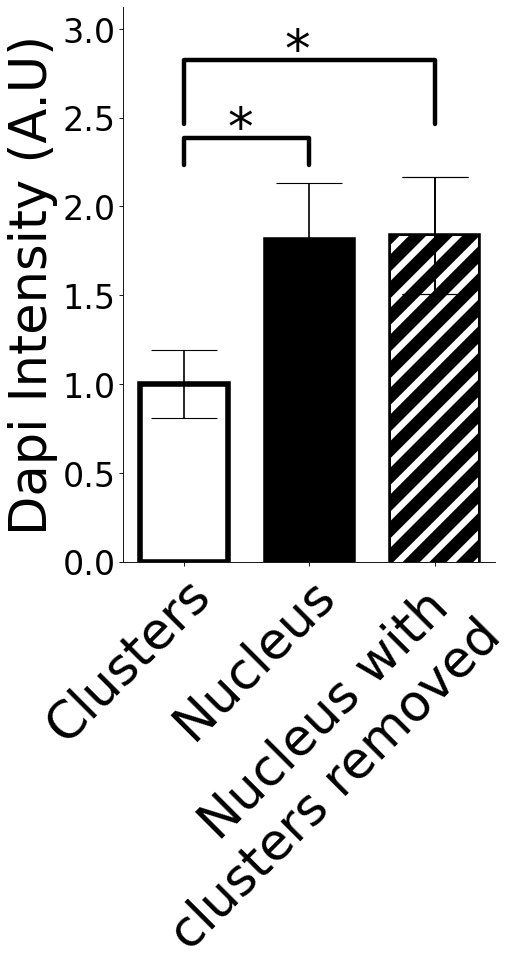

In [17]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [combine_data, nucleus_data, nuc_less_comb_data]#grupo onde tem todos os dados que serão calculados o ttest
means =  [combine_data.mean(), nucleus_data.mean(), nuc_less_comb_data.mean()] #grupo onde tem as informações da médias
erro = [combine_data.sem(), nucleus_data.sem(), nuc_less_comb_data.sem()] #grupo que contem a informação dos erros

cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'black'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'fakcluster_dapi_intensity_noenlarge.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'fakcluster_dapi_intensity_noenlarge.jpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Dapi Intensity (A.U)' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['Clusters', 'Nucleus', 'Nucleus with \n clusters removed'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

erro_ct = erro[0]/means[0]
erro_dox = erro[1]/means[0]
erro_dox2 = erro[2]/means[0]
erro = [erro_ct,erro_dox, erro_dox2]

ct_norm = means[0]/means[0]
dox_norm = means[1]/means[0]
dox_norm2 = means[2]/means[0]
means = [ct_norm, dox_norm, dox_norm2]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 
    
    
# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,slide,hightup,texthight):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1])+hightup #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.4 -slide # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':10,'shrinkB':10,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(Y)+texthight), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [1, 2, 3]  # localização da barra
width =0.7# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0], yerr=erro[0], capsize= tamanho_barra_erro, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize= tamanho_barra_erro, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
barra_doxo2 =  ax.bar(x[2], means[2], yerr=erro[2], capsize= tamanho_barra_erro, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[2])
barra_doxo2_listra = ax.bar(x[2], means[2],yerr=erro[2],  capsize =tamanho_barra_erro, width= width, color= 'none', hatch='/', edgecolor= 'white', linewidth= 0, label= labels[2])

# traço de significancia
traco("*",(1,2),(means[0],means[1]), -.25, 0, 0)
# traco(ttesting(grupos[1],grupos[2]),x[1:3],means_normalizado[1:3], 0.14, 1, 0)
traco("*",(1,3),(means[0],means[2]), -0.2, .2, .2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X,rotation=45, ha='right', rotation_mode='anchor')
mpl.rcParams['hatch.linewidth'] = 6 # tamanho da listra
plt.ylim(0,1.7* max(means))
# plt.xlim((x[0]),(x[2]))
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()